<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [143]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 24.5MB/s]


In [144]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

- 'Data': data em que os dados foram coletados.
- 'Visitantes Únicos': número de visitantes únicos que visitaram o site.
- 'Sessões': número de sessões de usuário individuais registradas.
- 'Taxa de Rejeição (%)': porcentagem de visitantes que saem do site após visualizar apenas uma página.
- 'Páginas por Sessão': número médio de páginas visualizadas por sessão.
- 'Principais Origens do Tráfego': principais fontes de tráfego para o site (por exemplo: direto, social, orgânico)
- 'Dispositivos': dispositivos usados pelos visitantes para acessar o site (por exemplo, desktop, celular, etc.)
- 'Eventos': ações específicas que os visitantes realizam no site.
- 'Taxa de Conversão (%)': porcentagem de visitantes que realizam uma ação desejada (por exemplo, fazer uma compra.)
- 'Tempo Médio de Sessão (minutos)': tempo médio que um visitante passa no site por sessão.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [146]:
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


In [147]:
df.columns

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')

Tempo de Sessão vs Taxa de Conversão

In [148]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Tempo de Sessão vs Taxa de Conversão",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão (min)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

Taxa de Rejeição vs Taxa de Conversão

In [149]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Taxa de Rejeição vs Taxa de Conversão",
    labels={"Taxa de Rejeição (%)": "Taxa de Rejeição (%)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição (%)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

In [150]:
corr_df = df.filter(['Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'])
corr_df.corr()

,Taxa de Rejeição (%),Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
Taxa de Rejeição (%),1.000000,-0.974824,-0.982036
Taxa de Conversão (%),-0.974824,1.000000,0.976846
Tempo Médio de Sessão (minutos),-0.982036,0.976846,1.000000


In [151]:
correlacao = df['Sessões'].corr(df['Taxa de Rejeição (%)'])

print('A correlação entre Sessões e Taxa de Rejeição é', correlacao)

A correlação entre Sessões e Taxa de Rejeição é -0.9689009239649653


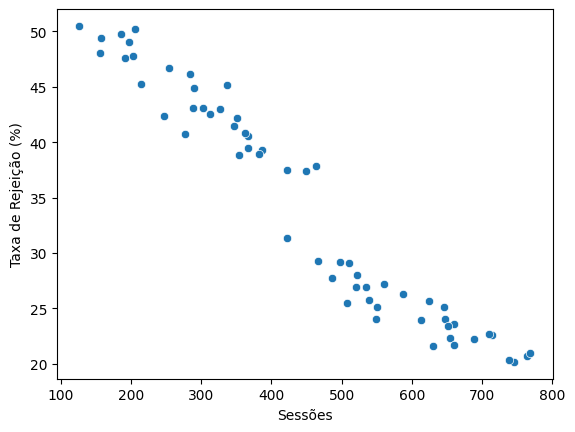

In [152]:
sns.scatterplot(data=df, x='Sessões', y='Taxa de Rejeição (%)')
plt.show()

Principais Origens do Tráfego
Direto        19
Orgânico      17
Social        11
Pago           7
Referência     6
Name: count, dtype: int64
Dispositivos
Desktop    31
Mobile     24
Tablet      5
Name: count, dtype: int64


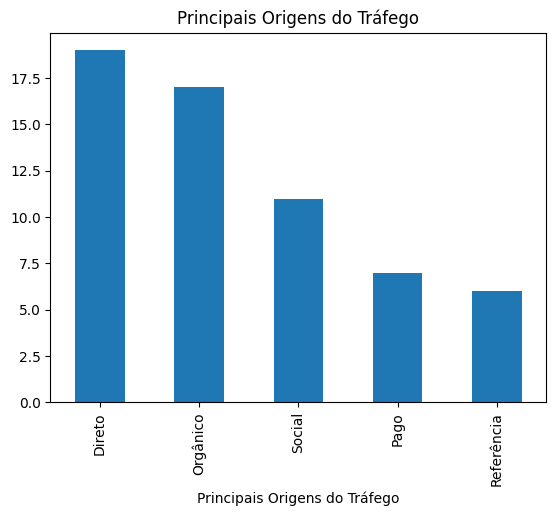

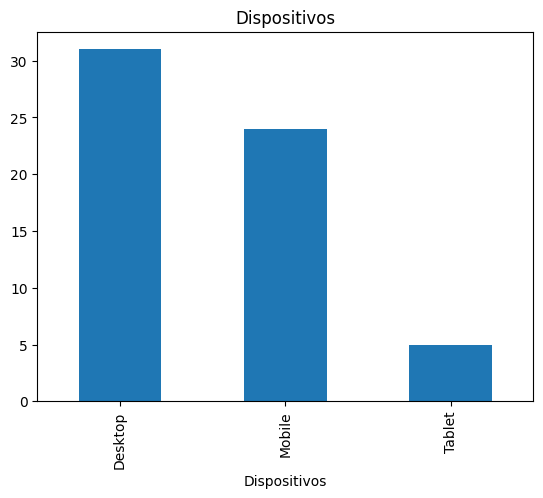

In [153]:
origens_trafego = df['Principais Origens do Tráfego'].value_counts()
print(origens_trafego)

dispositivos = df['Dispositivos'].value_counts()
print(dispositivos)

origens_trafego.plot(kind='bar')
plt.title('Principais Origens do Tráfego')
plt.show()

dispositivos.plot(kind='bar')
plt.title('Dispositivos')
plt.show()

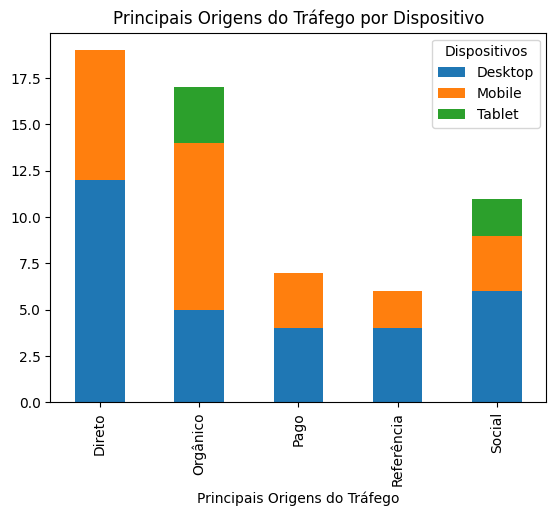

In [154]:
origens_dispositivos = df.groupby(['Principais Origens do Tráfego', 'Dispositivos']).size().unstack()

origens_dispositivos.plot(kind='bar', stacked=True)
plt.title('Principais Origens do Tráfego por Dispositivo')
plt.show()

In [155]:
total_visitantes_unicos = df['Visitantes Únicos'].sum()
print('A quantidade total de visitantes únicos que acessaram o site é', total_visitantes_unicos)

A quantidade total de visitantes únicos que acessaram o site é 18068.0


In [156]:
tabela = df[['Sessões', 'Visitantes Únicos', 'Taxa de Conversão (%)']]
print(tabela)

    Sessões  Visitantes Únicos  Taxa de Conversão (%)
0     126.0              113.0               1.952083
1     157.0               90.0               2.066180
2     185.0               92.0               2.058858
3     206.0              130.0               2.134617
4     155.0              123.0               2.420236
5     191.0              148.0               2.559353
6     197.0              150.0               2.501274
7     202.0              146.0               2.693574
8     284.0              137.0               2.714130
9     254.0              131.0               2.698200
10    214.0              159.0               2.883597
11    289.0              192.0               3.086007
12    336.0              186.0               3.013367
13    313.0              163.0               3.258159
14    247.0              198.0               2.924466
15    288.0              209.0               3.353377
16    351.0              191.0               3.364637
17    302.0              218

In [157]:
visitantes_unicos_por_dispositivo = df.groupby('Dispositivos')['Visitantes Únicos'].sum()
print('A quantidade de visitantes únicos por dispositivo é:', visitantes_unicos_por_dispositivo)

A quantidade de visitantes únicos por dispositivo é: Dispositivos
Desktop    8926.0
Mobile     7399.0
Tablet     1743.0
Name: Visitantes Únicos, dtype: float64


In [158]:
visitantes_unicos_por_origens = df.groupby('Principais Origens do Tráfego')['Visitantes Únicos'].sum()
print('A quantidade de visitantes únicos por origens de tráfego é:', visitantes_unicos_por_origens)

A quantidade de visitantes únicos por origens de tráfego é: Principais Origens do Tráfego
Direto        5439.0
Orgânico      5498.0
Pago          2053.0
Referência    2030.0
Social        3048.0
Name: Visitantes Únicos, dtype: float64


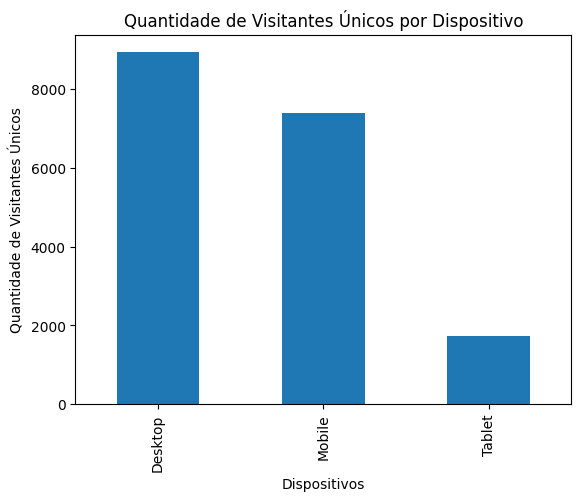

In [159]:
visitantes_unicos_por_dispositivo = df.groupby('Dispositivos')['Visitantes Únicos'].sum()

visitantes_unicos_por_dispositivo.plot(kind='bar')
plt.title('Quantidade de Visitantes Únicos por Dispositivo')
plt.xlabel('Dispositivos')
plt.ylabel('Quantidade de Visitantes Únicos')
plt.show()

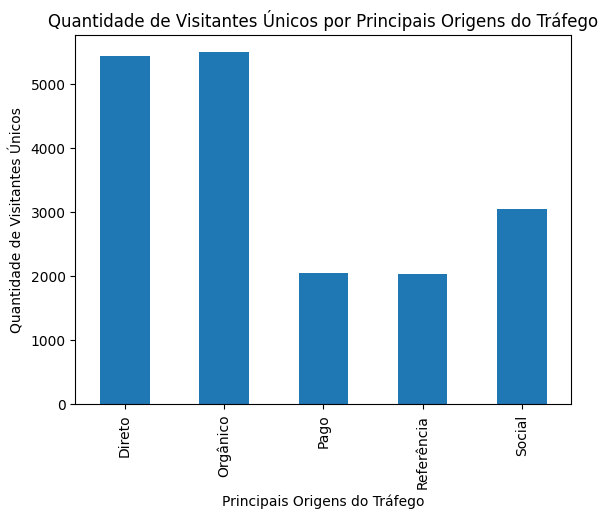

In [160]:
visitantes_unicos_por_origens = df.groupby('Principais Origens do Tráfego')['Visitantes Únicos'].sum()

visitantes_unicos_por_origens.plot(kind='bar')
plt.title('Quantidade de Visitantes Únicos por Principais Origens do Tráfego')
plt.xlabel('Principais Origens do Tráfego')
plt.ylabel('Quantidade de Visitantes Únicos')
plt.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [161]:
import plotly.express as px
import numpy as np
import pandas as pd

mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Rejeição (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Rejeição (%)'].mean()

observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Rejeição (%)'].std()

simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

base_rejection_rate = mean_rejection_rate_pre_change

new_rejection_rates = base_rejection_rate + simulated_effects

average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

data = pd.DataFrame({
    'New Rejection Rates': new_rejection_rates
})

fig = px.histogram(data, x='New Rejection Rates', nbins=50, title='Distribuição Simulada das Novas Taxas de Rejeição')
fig.add_vline(x=average_new_rejection_rate, line_dash="dash", line_color="red", annotation_text="Média")
fig.add_vline(x=percentile_5th, line_dash="dash", line_color="green", annotation_text="5º Percentil")
fig.add_vline(x=percentile_95th, line_dash="dash", line_color="green", annotation_text="95º Percentil")
fig.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

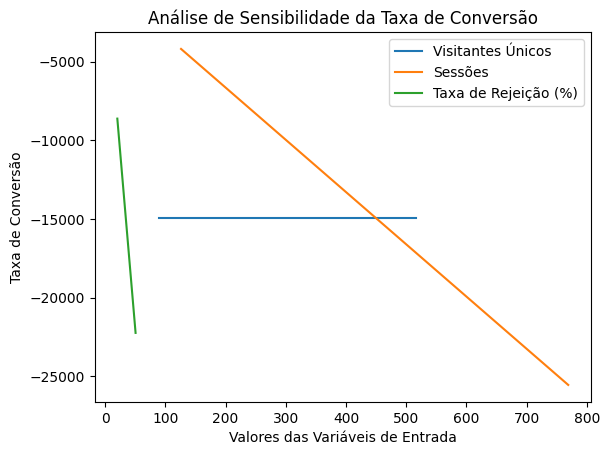

In [162]:
import numpy as np
import matplotlib.pyplot as plt

variacoes = {
    'Visitantes Únicos': [df['Visitantes Únicos'].min(), df['Visitantes Únicos'].max()],
    'Sessões': [df['Sessões'].min(), df['Sessões'].max()],
    'Taxa de Rejeição (%)': [df['Taxa de Rejeição (%)'].min(), df['Taxa de Rejeição (%)'].max()]
}

def taxa_conversao(visitantes_unicos, sessoes, taxa_rejeicao):
    return (visitantes_unicos * sessoes * (1 - taxa_rejeicao)) / visitantes_unicos

for variavel, intervalo in variacoes.items():
    valores = np.linspace(intervalo[0], intervalo[1], 100)
    resultados = [taxa_conversao(valor if variavel == 'Visitantes Únicos' else df['Visitantes Únicos'].mean(),
                                valor if variavel == 'Sessões' else df['Sessões'].mean(),
                                valor if variavel == 'Taxa de Rejeição (%)' else df['Taxa de Rejeição (%)'].mean()) for valor in valores]
    plt.plot(valores, resultados, label=variavel)

plt.legend()
plt.title('Análise de Sensibilidade da Taxa de Conversão')
plt.xlabel('Valores das Variáveis de Entrada')
plt.ylabel('Taxa de Conversão')
plt.show()


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.